# Step 1:- Read Dataset

In [1]:
import pandas as pd
A = pd.read_csv("C:Desktop/ML/digitsnpixels.csv")

A.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
A.tail(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 2:- Define X and Y

In [3]:
X = A.drop(labels=["label"],axis=1)
Y = A[["label"]]

## Note:-
X has total of 784 pixels and considering it as squared image then the size of that image will be 28*28

In [4]:
q = X[0:1].values

In [5]:
import numpy as np
np.sqrt(784)

28.0

# Step 3:- Plotting an Image

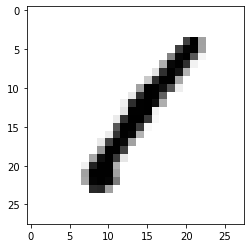

In [6]:
import matplotlib.pyplot as plt
plt.imshow(q.reshape(28,28),cmap=plt.cm.binary)

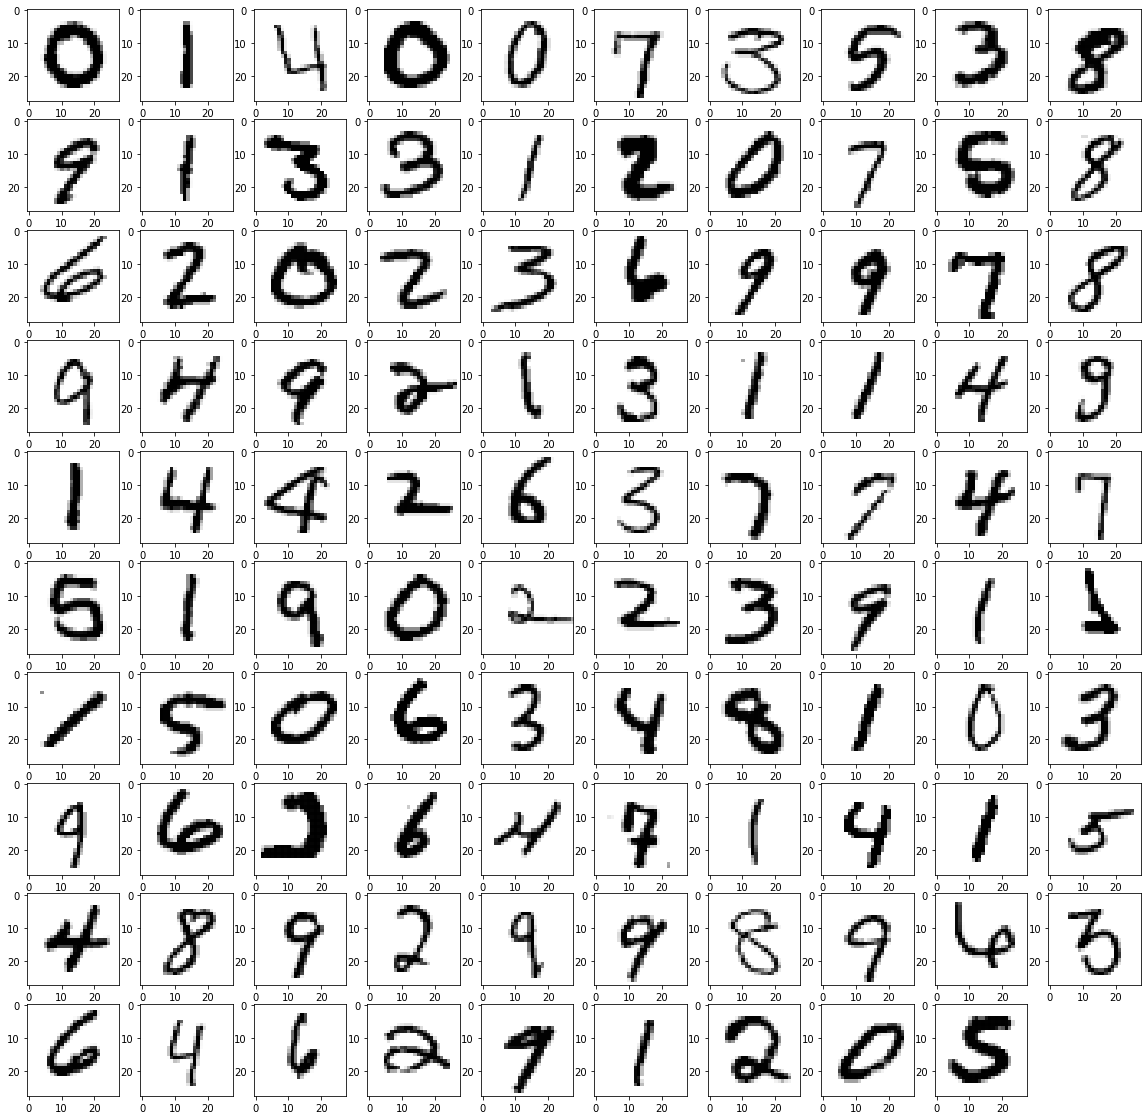

In [7]:
plt.figure(figsize=(20,20))
for i in range(1,100,1):
    q = X[i:i+1].values
    plt.subplot(10,10,i)
    plt.imshow(q.reshape(28,28),cmap=plt.cm.binary)

In [8]:
X[0:1].values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

# Step 4:- Prepare X and Y final

In [9]:
Xnew = (X/255).values

In [10]:
pd.get_dummies(Y.label).values

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [11]:
Ynew = pd.get_dummies(Y.label).values

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Ynew,test_size=0.2,random_state=21)

# Step 5:- Reshaping

In [13]:
print(Xnew.shape)
print(Ynew.shape)
print("xtrain",xtrain.shape)
print(ytrain.shape)
print("xtest",xtest.shape)
print(ytest.shape)

(42000, 784)
(42000, 10)
xtrain (33600, 784)
(33600, 10)
xtest (8400, 784)
(8400, 10)


In [14]:
xtrain = xtrain.reshape(33600,28,28,1)
xtest = xtest.reshape(8400,28,28,1)

# Step 6:- Create a Neural Network(NN)

In [15]:
from keras.models import Sequential 
from keras.layers import Dense,Convolution2D,MaxPooling2D,BatchNormalization,Dropout,Flatten

In [16]:
nn = Sequential()

nn.add(Convolution2D(filters = 16,kernel_size =(3,3),activation="relu",input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Convolution2D(filters = 16,kernel_size=(3,3),activation="relu"))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Convolution2D(filters = 16,kernel_size=(3,3),activation="relu"))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Flatten())
nn.add(Dense(10,activation="softmax"))

In [17]:
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

In [18]:
nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=6)

Epoch 1/6
1050/1050 [==============================] - 8s 7ms/step - loss: 0.8253 - accuracy: 0.7465 - val_loss: 0.2375 - val_accuracy: 0.9371
Epoch 2/6
1050/1050 [==============================] - 8s 7ms/step - loss: 0.3416 - accuracy: 0.8944 - val_loss: 0.1260 - val_accuracy: 0.9621
Epoch 3/6
1050/1050 [==============================] - 8s 7ms/step - loss: 0.2709 - accuracy: 0.9169 - val_loss: 0.1050 - val_accuracy: 0.9713
Epoch 4/6
1050/1050 [==============================] - 8s 7ms/step - loss: 0.2372 - accuracy: 0.9267 - val_loss: 0.1094 - val_accuracy: 0.9671
Epoch 5/6
1050/1050 [==============================] - 8s 7ms/step - loss: 0.2139 - accuracy: 0.9327 - val_loss: 0.0874 - val_accuracy: 0.9763
Epoch 6/6
1050/1050 [==============================] - 8s 7ms/step - loss: 0.2093 - accuracy: 0.9362 - val_loss: 0.0819 - val_accuracy: 0.9761


# Step 7: Prediction

In [19]:
xpred = X[18:19].values/255

In [20]:
xpred1 = xpred.reshape(1,28,28,1)

In [21]:
q = nn.predict(xpred1)

In [22]:
q

array([[3.8119233e-05, 2.2736401e-04, 8.4506714e-04, 1.3697108e-04,
        7.7976136e-07, 9.4109437e-06, 2.2124335e-07, 9.9857974e-01,
        1.7352448e-05, 1.4500027e-04]], dtype=float32)

In [23]:
W = pd.DataFrame(q).T
W["label"] = range(0,10)

In [24]:
W

,0,label
0,3.811923e-05,0
1,2.273640e-04,1
2,8.450671e-04,2
3,1.369711e-04,3
4,7.797614e-07,4
5,9.410944e-06,5
6,2.212434e-07,6
7,9.985797e-01,7
8,1.735245e-05,8
9,1.450003e-04,9


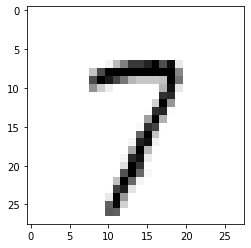

In [29]:
plt.imshow(X[18:19].values.reshape(28,28),cmap=plt.cm.binary)

# Conclusion:- 
Convolution_Neural_Network(CNN) is a Image Classification Algorithm which include layers like Convolution Layer,Pooling layer,Fully connected layer and Output layer.In this example we have 
predicted the label value for X[18:19] and 
validation accuracy is 97.61%  &  
 label value = 7

# ---------------------------------------------------------------------------------------------------------------